### We are required to model the demand for shared bikes for BoomBikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Model should be such that management can understand demand dynamics of new market easily. 

### Step 1) Reading, understanding and visualisation of data

In [1]:
# Supress warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# for displaying the max col and row values
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)

In [4]:
# Reading the csv data file and checking the head of the dataset

bike = pd.read_csv(r'C:\\Users\\dell\\Desktop\\Machine Learning 1\\2) Linear Regression Assignment\\day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Inspection

bike.shape

(730, 16)

In [6]:
# Checking dtypes and if there is any null value.

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###### There is not any null or empty column.

######  Here following features(columns) should be categorical features:-
    #1) season
    2) yr
    3) mnth
    4) holiday
    5) weekday
    6) workingday
    7) weathersit
Currently, Datatypes of the values of these features are numerical(int64).
So, we need to convert the datatypes from numerical to object or categorical type for features having non-binary values, in order to create DUMMY VARIABLE.
So, create DUMMY VARIABLES for the given categorical column having non-binary values.

Hence, we need to convert datatypes of following features from numerical to categorical in order to create dummy variable:-
    #1) season
    2) mnth
    3) weekday
    4) weathersit

Rest features like 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt' have continuous(float64/int64) datatypes.

Now, before changing the datatypes of the categorical features and creating dummy variables for them, we will drop some extra columns, those which are of no use in the prediction and projection.

###### Following are the columns which we will drop:-
    #1) instant - It is just showing us the record index, so we can consider it an extra column and drop it.
    2) dteday - It is showing the date. We do not need this  as there are other columns like season, yr, mnth, holiday, weekday, workingday.
    3) casual - Count of casual usere.
    4) registered - It shows count of registered users. We do not need these two columns i.e 'casual', 'registered' as we have a column called 'cnt', which shows the count of total rental bike including casual and rental.

In [7]:
# Drop the unnecessary columns

drop_list = ['instant', 'dteday', 'casual', 'registered']

bike.drop(drop_list, axis=1, inplace=True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
# Change datatypes of ''season','yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit' from numerical to object
# After changing the dtypes we can do some categorical feature visualisation and create dummy variable for non-binary values.
# We are also converting dtypes of binary value features, later we will convert the dtypes of those features back to int64.

cat_list = ['season','yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']

bike[cat_list] = bike[cat_list].astype('object')

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null object
mnth          730 non-null object
holiday       730 non-null object
weekday       730 non-null object
workingday    730 non-null object
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


In [9]:
# Inspection of numerical column

bike1 = bike.describe()
bike1

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


### Visualisation of the data

Now, let's understand the data.

Here we can also observe the correlation between the variables.

##### Here We will plot 'pairplot' for numerical variables.

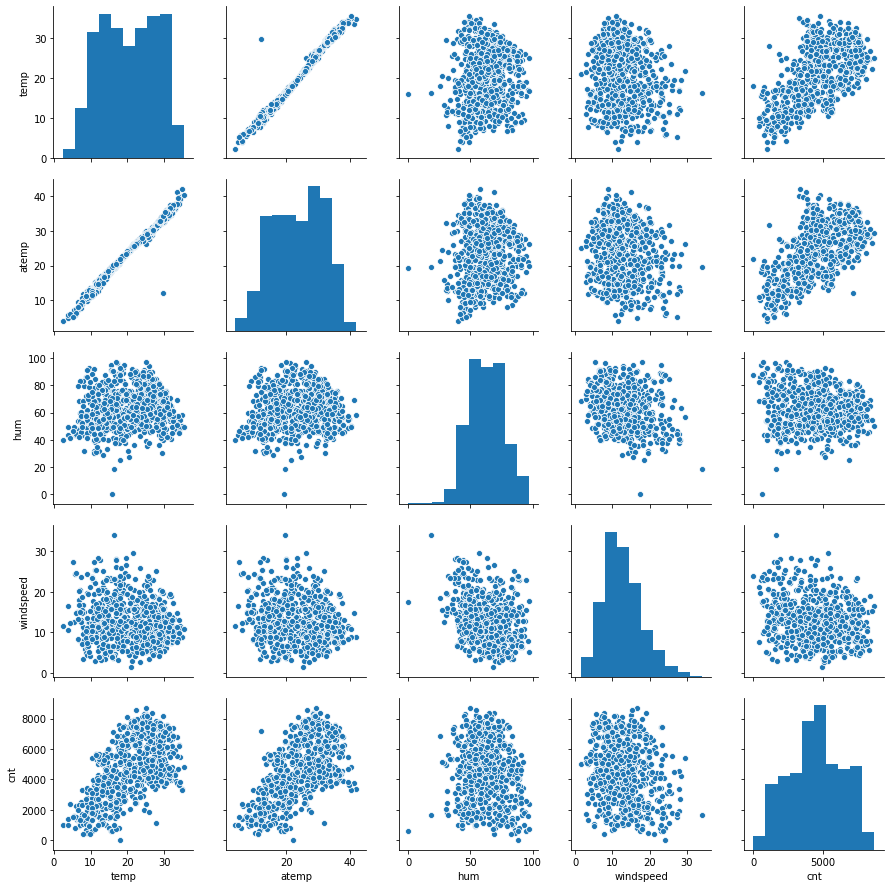

In [10]:
# pairplot for numerical features

sns.pairplot(data=bike, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

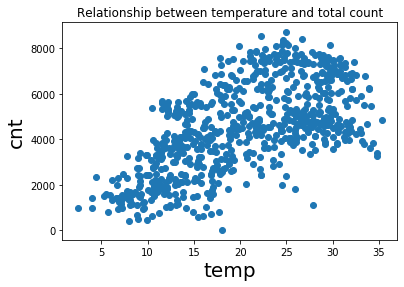

In [11]:
# scatter plot to observe relationship between 'temp' and 'cnt'

plt.scatter(x='temp', y='cnt', data=bike)
plt.xlabel('temp', fontsize=20)
plt.ylabel('cnt', fontsize=20)
plt.title('Relationship between temperature and total count')
plt.show()

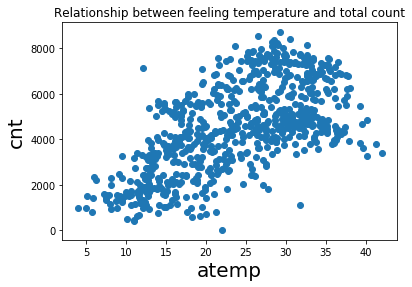

In [12]:
# scatter plot to observe relationship between 'atemp' and 'cnt'

plt.scatter(x='atemp', y='cnt', data=bike)
plt.xlabel('atemp', fontsize=20)
plt.ylabel('cnt', fontsize=20)
plt.title('Relationship between feeling temperature and total count')
plt.show()

Here we can see that there is a clear relationship between temperature of the day and total count of the rental bike. As the temperature is increasing the count of the rented bike is also increasing.

 ##### Now, we will plot 'boxplot' in order to visualise categorical variables.

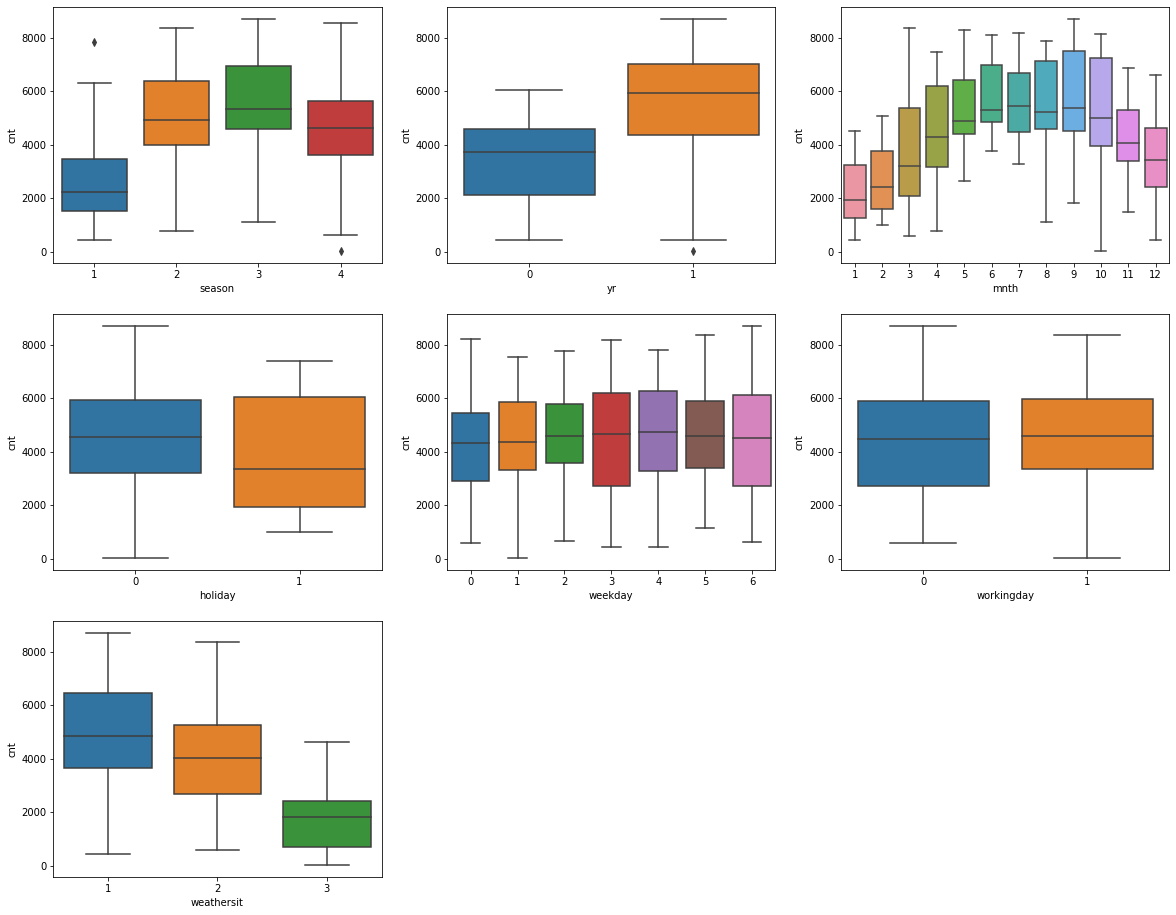

In [13]:
# plotting boxplot to observe the relationship between different categorical values and 'cnt'

plt.figure(figsize=(20,16))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.show()

Here all different categorical features have values like 0,1,2,3,4. It is not to be confused by the ordinal values.
These values are not ordinal values. It has different meaning which is mentioned below:-

#season : season (1:spring, 2:summer, 3:fall, 4:winter)
#yr : year (0: 2018, 1:2019)
#mnth : month ( 1 to 12)
#holiday : weather day is a holiday or not(0/1)
#weekday : day of the week(0,1,2,3,4,5,6)
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
#weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### Step 2) Data preparation
#In few steps back we have converted few columns like - 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit' from numerical to object datatypes.

#Now we will create dummy variables for those categorical columns which has more than two values, i.e. 'season', 'mnth', 'weekday', 'weathersit'.

#Other variables which have values in binary form i.e 0 & 1 and for which we do not require to create dummy variables are :'yr', 'holiday', 'workingday'.

In [14]:
# checking the categorical values which has more than 2 values or binary values, we will create dummy variables for such columns

print(bike.season.describe())
print('\n',bike.yr.describe())
print('\n',bike.mnth.describe())
print('\n',bike.holiday.describe())
print('\n',bike.weekday.describe())
print('\n',bike.workingday.describe())
print('\n',bike.weathersit.describe())

count     730
unique      4
top         3
freq      188
Name: season, dtype: int64

 count     730
unique      2
top         1
freq      365
Name: yr, dtype: int64

 count     730
unique     12
top        12
freq       62
Name: mnth, dtype: int64

 count     730
unique      2
top         0
freq      709
Name: holiday, dtype: int64

 count     730
unique      7
top         6
freq      105
Name: weekday, dtype: int64

 count     730
unique      2
top         1
freq      499
Name: workingday, dtype: int64

 count     730
unique      3
top         1
freq      463
Name: weathersit, dtype: int64


##### Dummy Variable
In order to fit a regression line, we would need numerical values So, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [15]:
# Get the dummy variable for features 'season', 'mnth', 'weekday', 'weathersit'.
# Store them in new variables 'dummy_1', 'dummy_2', 'dummy_3', 'dummy4'.
# Suppose if there are (n) levels in a particular feature the the no. of columns that we need in dummy variables are (n-1)
# So, we will drop the first column using 'drop_first=True'
# We will use get_dummies to create the dummy variable and pass prefix in the argument so that we can easily recognise the feature.

dummy_1 = pd.get_dummies(bike['season'], prefix = 'season', drop_first = True)
dummy_2 = pd.get_dummies(bike['mnth'], prefix = 'mnth', drop_first = True)
dummy_3 = pd.get_dummies(bike['weekday'], prefix = 'weekday', drop_first = True)
dummy_4 = pd.get_dummies(bike['weathersit'], prefix = 'weathersit', drop_first = True)

In [16]:
# Check the newly created dummy variable datasets
dummy_1.head()
dummy_2.head()
dummy_3.head()
dummy_4.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [17]:
# Now, let's add all the four newly created dummy variables to the original housing dataset.

bike = pd.concat([bike, dummy_1, dummy_2, dummy_3, dummy_4], axis=1)

In [18]:
# Let's check our new dataframe

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [19]:
int_list = ['season','yr', 'mnth', 'holiday', 'workingday', 'weekday', 'weathersit']

bike[int_list] = bike[int_list].astype('int64')

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
season          730 non-null int64
yr              730 non-null int64
mnth            730 non-null int64
holiday         730 non-null int64
weekday         730 non-null int64
workingday      730 non-null int64
weathersit      730 non-null int64
temp            730 non-null float64
atemp           730 non-null float64
hum             730 non-null float64
windspeed       730 non-null float64
cnt             730 non-null int64
season_2        730 non-null uint8
season_3        730 non-null uint8
season_4        730 non-null uint8
mnth_2          730 non-null uint8
mnth_3          730 non-null uint8
mnth_4          730 non-null uint8
mnth_5          730 non-null uint8
mnth_6          730 non-null uint8
mnth_7          730 non-null uint8
mnth_8          730 non-null uint8
mnth_9          730 non-null uint8
mnth_10         730 non-null uint8
mnth_11         730 non-null uint8
mnth_12     

##### Visualising the data after changing the dtypes

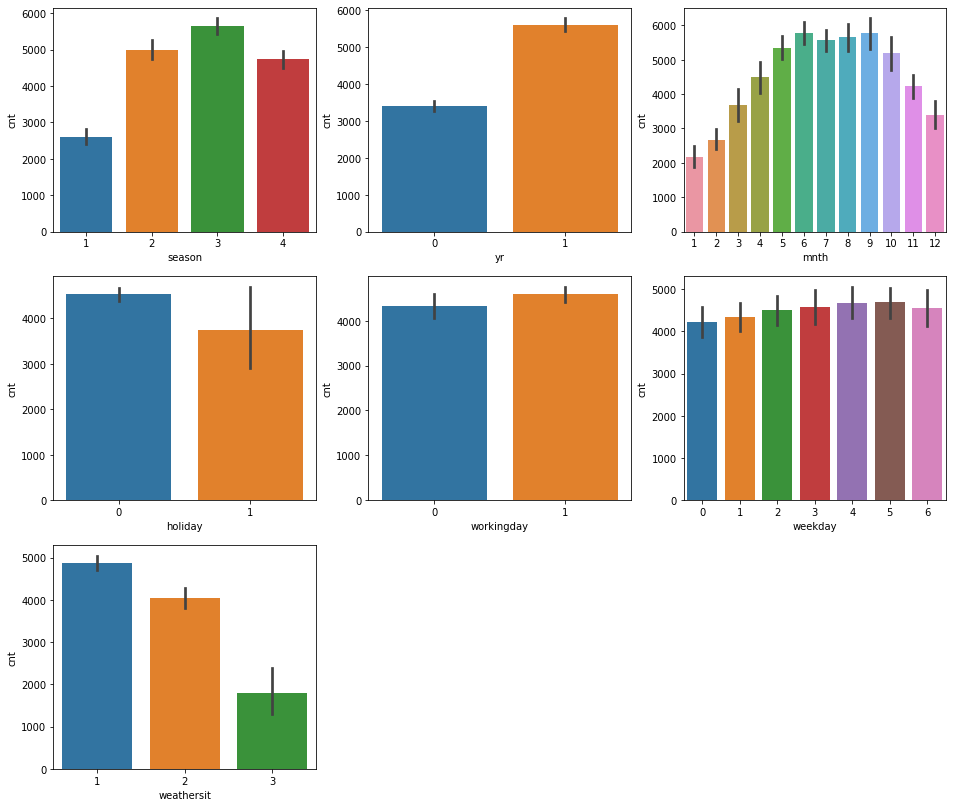

In [20]:
#Lets visualise and compare the change in the count ('cnt') with respect to the change in values.

plt.figure(figsize=(16,14))

plt.subplot(3,3,1)
sns.barplot(x="season", y="cnt", data=bike)
plt.subplot(3,3,2)
sns.barplot(x="yr", y="cnt", data=bike)
plt.subplot(3,3,3)
sns.barplot(x="mnth", y="cnt", data=bike)
plt.subplot(3,3,4)
sns.barplot(x="holiday", y="cnt", data=bike)
plt.subplot(3,3,5)
sns.barplot(x="workingday", y="cnt", data=bike)
plt.subplot(3,3,6)
sns.barplot(x="weekday", y="cnt", data=bike)
plt.subplot(3,3,7)
sns.barplot(x="weathersit", y="cnt", data=bike)
plt.show()

We can visualise the plots and we can clearly understand what influences count ('cnt') the most.

In [21]:
# Now let's drop 'season', 'mnth', 'weekday', 'weathersit', as we have created dummies for the same.

bike.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace=True)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [22]:
#Let's check the final number of rows and columns before befor dividing dataset into test and train.
bike.shape

(730, 30)

So, finally we have 730 rows and 30 columns.

In [23]:
# check the dtypes of the feature so that we can change the dtypes of any feature if required for further analysis.

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr              730 non-null int64
holiday         730 non-null int64
workingday      730 non-null int64
temp            730 non-null float64
atemp           730 non-null float64
hum             730 non-null float64
windspeed       730 non-null float64
cnt             730 non-null int64
season_2        730 non-null uint8
season_3        730 non-null uint8
season_4        730 non-null uint8
mnth_2          730 non-null uint8
mnth_3          730 non-null uint8
mnth_4          730 non-null uint8
mnth_5          730 non-null uint8
mnth_6          730 non-null uint8
mnth_7          730 non-null uint8
mnth_8          730 non-null uint8
mnth_9          730 non-null uint8
mnth_10         730 non-null uint8
mnth_11         730 non-null uint8
mnth_12         730 non-null uint8
weekday_1       730 non-null uint8
weekday_2       730 non-null uint8
weekday_3       730 non-null uint8
weekday_4   

Now, we finally have 730 enteries along with 30 columns and all the features have numerical data type. Having numerical datatype of the feature is essential to perform the LinearRegression modelling. Now, we can go ahead and start preparing dataset for LinearRegression.

##### Dividing the data into Training and Test sets

Test-Train-Split is the first basic step of regression. Here we will divide data in the ratio of 70:30. 70 % of training data and 30 % of testing data.

In [24]:
# Let's divide the data and store "test data" in "df_test" variable and "training data" in "df_train" variable.

from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

##### Scaling of the features

Scaling is a technique to standardize the independent features present in the data in a fixed range.
#This 'bike' dataset contains features varying in magnitude, unit and range.
#If features differ in scale then this may impact the resultant coefficients of the model and it can be hard to interpret the coefficients.
#So it is extremely important to rescale the variables so that they have a comparable scale.
#So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.
#Two common ways of rescaling:
    #-Min-Max scaling
    -Standardisation (mean-0, sigma-1)

In [25]:
# Scaling
# We will use Min-Max scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
# Apply scaler() to all the column except 'Categorical variable' columns having binary values(0 & 1) and 'Dummy variables'.
# Basically, apply scaler() on the numerical features of the dataset.

num_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_list] = scaler.fit_transform(df_train[num_list])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [27]:
# Now, all the features are of numerical datatypes. We can observe different parameters of the dataset.

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


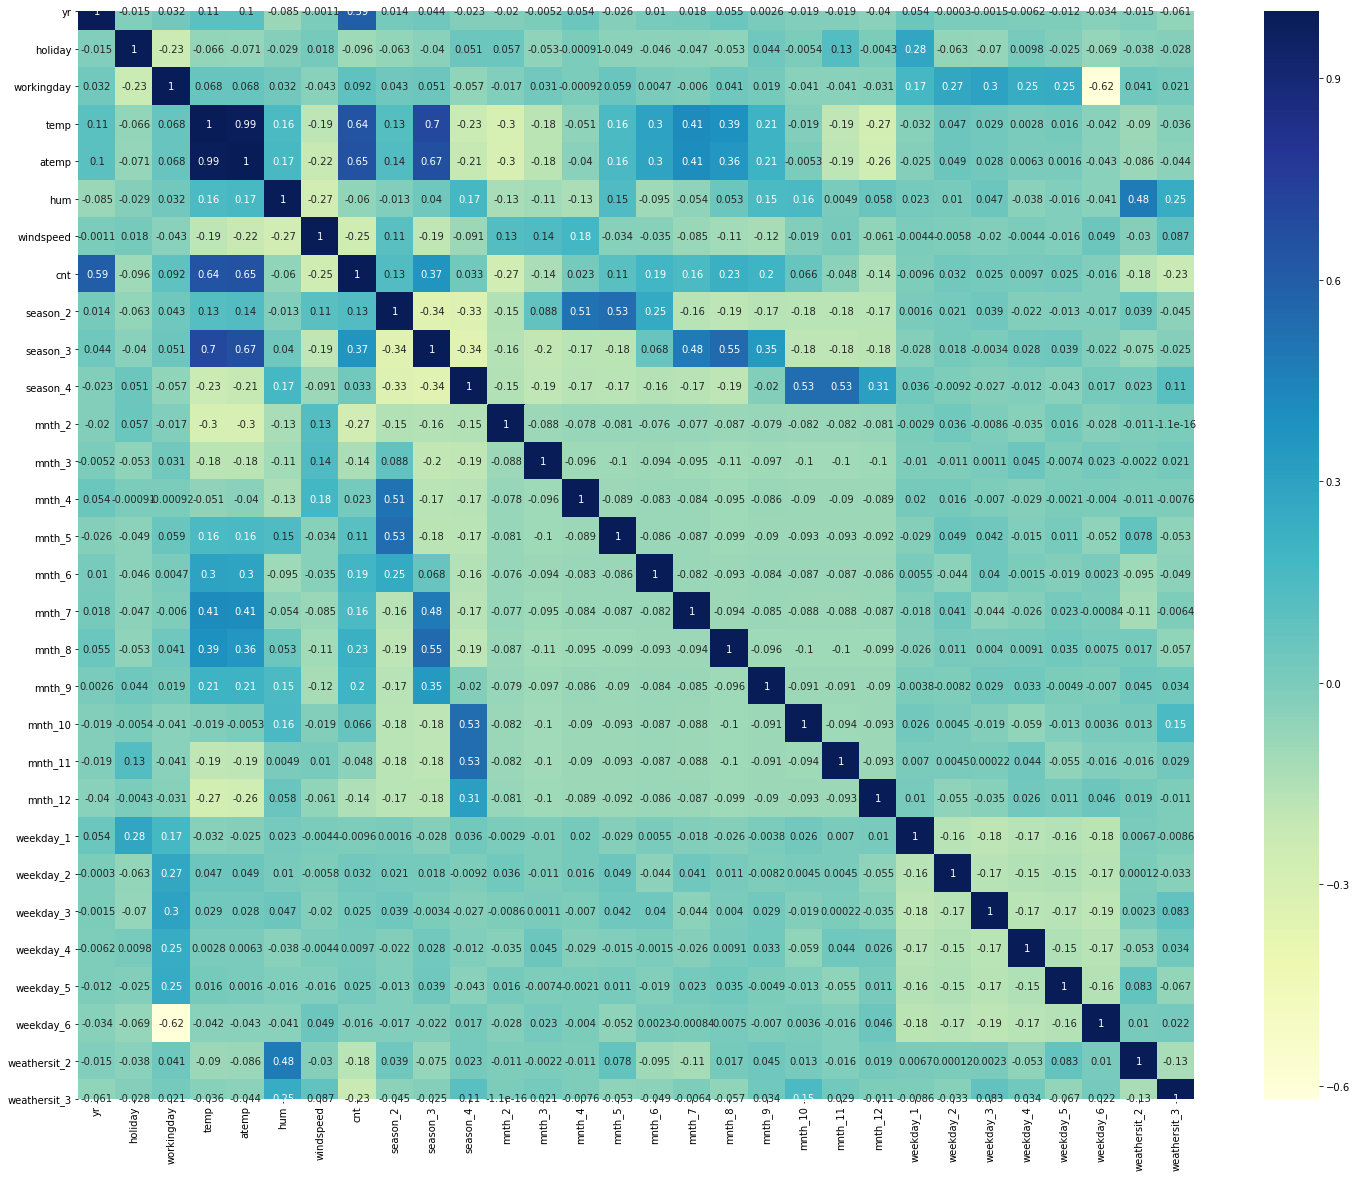

In [28]:
# Now. let's observe the correlation between different features.
# We will use Heatmap to observe the correlation.

plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In the heatmap we can see that 'yr', 'temp' and 'atemp', all three are highly correlated with 'cnt' i.e Total count.

##### Divide the df_train data into X and Y sets for further model building.

In [29]:
# Now, let's divide features of the training dataset between x and y.
# Here, total count i.e 'cnt' is our target variable. So, 'cnt' feature will be stored in y_train.
# Rest features other than 'cnt' is stored in x_train.

y_train = df_train.pop('cnt')
x_train = df_train

In [31]:
import statsmodels.api as sm
# Add a constant
X_train_sk=sm.add_constant(y_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sk).fit()

In [32]:
# Check the parameters obtained

lr.params

const   -2.185752e-16
cnt      1.000000e+00
dtype: float64

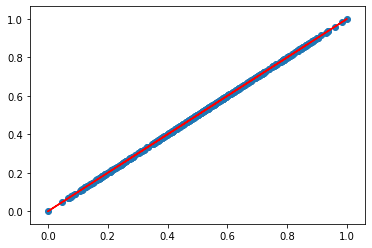

In [33]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_sk.iloc[:, 1], y_train)
plt.plot(X_train_sk.iloc[:, 1], -2.185752e-16 + 1.000000e+00*X_train_sk.iloc[:, 1], 'r')
plt.show()

Here we can visualise linear relation ship between predictor variable and target variable

### Step 3) Data Modelling and Evaluation

##### Now, let's create LinearRegression model using mixed approach i.e by R.F.E as well as manual approach.

### RFE
###### Recursive Feature Elimination

With the help of Recursive feature elimination (RFE) we can fit a model and remove the weakest feature (or features) until the specified number of features is reached.

In [34]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with output number of variables equal to 15

lm=LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(x_train, y_train)

In [36]:
# Let's observe the strongest and weakest feature selected by RFE

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 15),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', False, 6),
 ('mnth_4', False, 8),
 ('mnth_5', False, 7),
 ('mnth_6', False, 9),
 ('mnth_7', False, 11),
 ('mnth_8', False, 2),
 ('mnth_9', True, 1),
 ('mnth_10', False, 12),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 5),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1)]

In [37]:
# We will store the strong features selected by RFE in col variable
# We will use these features further while manually handling the dataset

col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weathersit_3'], dtype='object')

In [38]:
# Let's see the weakest features selected by RFE

x_train.columns[~rfe.support_]

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6', 'weathersit_2'], dtype='object')

### Manual approach--using statsmodels
##### Now, let's go ahead with the manual approach and build model using statsmodels, for the detailed statistics.

In [39]:
# creating x_train dataframe using RFE selected variables
x_train_rfe = x_train[col]

In statsmodels we need to explicitly fit a constant using sm.add_constant(x), if we do not add constant, statsmodels will fit a regression line passing through the origin.

In [40]:
# Adding a constant variable

import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [41]:
# Running the linear model

lm = sm.OLS(y_train, x_train_rfe).fit()

In [42]:
# Summary of the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.30e-181
Time:                        22:52:01   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -954.9
Df Residuals:                     495   BIC:                            -891.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2579      0.027      9.559   

#_From the above statistical values we can observe the P-values for each feature.
#_P-value tell whether the coefficients are significant or not.
#_We can also observe the value of R-squared and adjusted R-squared i.e. 0.831 and 0.827 respectively.
#_R-squared values tells exactly how much variance in the data has been explained by the model.
#_Adjusted R-squared penalises the models on the basis of the number of variables present in them.
#_F-statistics tells whether the overall model fit is significant or is fit just by chance.

#_Here we will consider that p-value < 0.05 is stratigically significant.
#_Here we can observe that following features have p-value>0.05:-
#_'weekday_5', 'weekday_4', 'weekday_3', 'weekday_2', 'weekday_1'
#_So, we will drop insignificant variables one-by-one.
#_But before that we will also calculate and observe the VIF values of the feeatures to check if multicollinearity exists in the feature.
#_If VIF is high it means this feature is explained very well by other variables. So, it may not add much in the model. We will anly accept those values whose VIF<5.
#_So, after observing VIF and p-values together we will drop the collinear or insignificant values.

In [43]:
# Drop 'const' columns in order to observe correct VIF values.

x_train_new = x_train_rfe.drop(['const'], axis=1)

In [44]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,10.94
3,temp,7.20
5,windspeed,3.58


Here we can see that VIF of different dummy variables are infinity, and p-values are also high. We can also observe that features like 'hum', 'temp' has vif > 5. But as per p-values hum and temp are significant. So, we will start by dropping features having high p-value and high vif one-by-one and keep observing the change in statistical values.

In [45]:
# drop 'weekday_5'

x_train_new = x_train_new.drop(['weekday_5'], axis=1)

###### -Rebuilding the model without 'weekday_5'

In [46]:
# adding constant variable
x_train_rfe_1 = sm.add_constant(x_train_new)

In [47]:
# Running the linear model
lm = sm.OLS(y_train, x_train_rfe_1).fit()

In [48]:
# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          5.30e-181
Time:                        22:52:14   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -954.9
Df Residuals:                     495   BIC:                            -891.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2579      0.027      9.559   

In [49]:
# Drop 'const' columns in order to observe correct VIF values.

x_train_new_1 = x_train_rfe_1.drop(['const'], axis=1)

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.94
2,workingday,7.44
3,temp,7.20
5,windspeed,3.58
9,weekday_1,2.29
11,weekday_3,2.27
12,weekday_4,2.06
10,weekday_2,2.04
0,yr,2.03
7,season_4,1.64


VIF of 'hum' and 'workingday' and 'temp' are is higher. p-value of 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4' and'workingday' are higher. Let drop 'weekday_3'

In [51]:
# Drop "weekday_3"

x_train_new_1 = x_train_new_1.drop(['weekday_3'], axis=1)

##### -Rebuilding the model without 'weekday_3'

In [52]:
# adding constant variable
x_train_rfe_2 = sm.add_constant(x_train_new_1)

In [53]:
# Running the linear model
lm = sm.OLS(y_train, x_train_rfe_2).fit()

In [54]:
# Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          3.80e-182
Time:                        22:52:24   Log-Likelihood:                 492.43
No. Observations:                 510   AIC:                            -956.9
Df Residuals:                     496   BIC:                            -897.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2579      0.027      9.571   

In [56]:
# Drop 'const' columns in order to observe correct VIF values.

x_train_new_2 = x_train_rfe_2.drop(['const'], axis=1)

In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.94
3,temp,7.20
2,workingday,4.50
5,windspeed,3.58
0,yr,2.03
7,season_4,1.64
9,weekday_1,1.64
6,season_2,1.58
11,weekday_4,1.47
10,weekday_2,1.46


'hum' and 'temp' has high VIF value and 'weekday_1', 'weekday_2', 'weekday_4' and'workingday' has high p-value. Let's drop 'weekday_4' as it has very high p-value.

In [58]:
# Drop "weekday_4 "

x_train_new_2 = x_train_new_2.drop(['weekday_4'], axis=1)

##### -Rebuilding the model without 'weekday_4'

In [59]:
# adding constant variable

x_train_rfe_3 = sm.add_constant(x_train_new_2)

In [60]:
# running the linear model
lm = sm.OLS(y_train, x_train_rfe_3).fit()

In [61]:
# summary of linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          2.69e-183
Time:                        22:52:35   Log-Likelihood:                 492.40
No. Observations:                 510   AIC:                            -958.8
Df Residuals:                     497   BIC:                            -903.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2577      0.027      9.577   

In [62]:
# Drop 'const' columns in order to observe correct VIF values.

x_train_new_3 = x_train_rfe_3.drop(['const'], axis=1)

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.93
3,temp,7.20
2,workingday,3.73
5,windspeed,3.58
0,yr,2.03
7,season_4,1.64
6,season_2,1.58
9,weekday_1,1.46
10,weekday_2,1.32
1,holiday,1.23


Now, 'weekday_1' and 'weekday_2' has very high p-values and 'hum' and 'temp' have very high VIF. Let's drop 'hum'

In [64]:
# drop 'hum'

x_train_new_3 = x_train_new_3.drop(["hum"], axis=1 )

##### -Rebuilding model without 'hum'

In [65]:
# adding constant variable

x_train_rfe_4 = sm.add_constant(x_train_new_3)

In [66]:
# running linear model

lm = sm.OLS(y_train, x_train_rfe_4).fit()

In [67]:
# summary of linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          6.89e-169
Time:                        22:52:43   Log-Likelihood:                 455.48
No. Observations:                 510   AIC:                            -887.0
Df Residuals:                     498   BIC:                            -836.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0770      0.019      4.123   

In [68]:
# Drop 'const' columns in order to observe correct VIF values.

x_train_new_4 = x_train_rfe_4.drop(['const'], axis=1)

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.29
2,workingday,3.47
4,windspeed,3.15
0,yr,2.02
5,season_2,1.55
8,weekday_1,1.46
6,season_4,1.37
9,weekday_2,1.32
1,holiday,1.22
7,mnth_9,1.20


Here we can observe that VIF values of all the features are less than 5. But three features i.e 'weekday_1' and 'weekday_2'and 'workingday' have p-values > 0.05. So, let's drop 'weekday_2

In [70]:
# drop 'weekday_2'

x_train_new_4 = x_train_new_4.drop(["weekday_2"], axis=1 )

##### -Rebuilding model without 'weekday_2'

In [71]:
# adding constant variable

x_train_rfe_5 = sm.add_constant(x_train_new_4)

In [72]:
# running linear model

lm = sm.OLS(y_train, x_train_rfe_5).fit()

In [73]:
# summary of linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     205.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          7.45e-170
Time:                        22:52:52   Log-Likelihood:                 455.00
No. Observations:                 510   AIC:                            -888.0
Df Residuals:                     499   BIC:                            -841.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0775      0.019      4.155   

In [74]:
# Drop 'const' columns in order to observe correct VIF values.

x_train_new_5 = x_train_rfe_5.drop(['const'], axis=1)

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.29
4,windspeed,3.15
2,workingday,3.10
0,yr,2.02
5,season_2,1.55
8,weekday_1,1.38
6,season_4,1.37
1,holiday,1.21
7,mnth_9,1.20
9,weathersit_3,1.06


 VIF is under allowable limit. P-value of 'workingday' has increased. So, now we have 'weekday_1' and 'workingday' with high p-values. Let's drop 'weekday_1'

In [76]:
# drop 'weekday_1'

x_train_new_5 = x_train_new_5.drop(["weekday_1"], axis=1 )

##### -Rebuilding model without 'weekday_1'

In [77]:
# adding constant variable

x_train_rfe_6 = sm.add_constant(x_train_new_5)

In [78]:
# running linear model

lm = sm.OLS(y_train, x_train_rfe_6).fit()

In [79]:
# summary of linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.3
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          8.54e-171
Time:                        22:53:00   Log-Likelihood:                 454.41
No. Observations:                 510   AIC:                            -888.8
Df Residuals:                     500   BIC:                            -846.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0776      0.019      4.159   

In [80]:
# Drop 'const' columns in order to observe correct VIF values.

x_train_new_6 = x_train_rfe_6.drop(['const'], axis=1)

In [81]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.28
4,windspeed,3.15
2,workingday,2.87
0,yr,2.01
5,season_2,1.55
6,season_4,1.37
7,mnth_9,1.20
1,holiday,1.07
8,weathersit_3,1.06


Now, VIF is under allowable limit but p-value of 'workingday' has increased to 0.115. We need to drop 'workingday'.

In [82]:
# drop 'workingday'

x_train_new_6 = x_train_new_6.drop(["workingday"], axis=1 )

##### -Rebuilding model without 'workingday'

In [83]:
# adding constant variable

x_train_rfe_7 = sm.add_constant(x_train_new_6)

In [84]:
# running linear model

lm = sm.OLS(y_train, x_train_rfe_7).fit()

In [85]:
# summary of linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     256.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):          1.42e-171
Time:                        22:53:09   Log-Likelihood:                 453.37
No. Observations:                 510   AIC:                            -888.7
Df Residuals:                     501   BIC:                            -850.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0872      0.017      5.001   

In [86]:
# Drop 'const' columns in order to observe correct VIF values.

x_train_new_7 = x_train_rfe_7.drop(['const'], axis=1)

In [87]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_new_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,2.97
0,yr,2.00
4,season_2,1.55
5,season_4,1.35
6,mnth_9,1.20
7,weathersit_3,1.06
1,holiday,1.03


Now, after dropping "weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5", "workingday", whose p-values>0.05 and after observing the VIF values for multicollinearity and dropping 'hum' i.e humidity variable as it was very high we have 8 predictor variables which we can count on.

So, we can observe different statistical values:-
    #1) R-square = 0.803
    2) Adj. R-squared: 0.800
    
    Here difference between Adj. R-squared and R-squared is 0.003, which is less than 0.005.
    So, it is a very good fit as R-square is telling that around 80% variance in the data is being explained by the model.
    P-value is less than 0.05 from which we can say that coefficients are significant. And VIF value for each of the eight variables is less than 5. So, we can say that predictors are independent.

In [88]:
# Let's check out final predictor 'training' dataset

x_train_rfe_7.head()

,const,yr,holiday,temp,windspeed,season_2,season_4,mnth_9,weathersit_3
653,1.0,1,0,0.509887,0.300794,0,1,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0


In [89]:
# Let's check the entries and columns of the final training dataset

x_train_rfe_7.shape

(510, 9)

### Step 4) Check the assumptions
##### Residual analysis of the train data.
#####  Assumption-1 : Error terms are normally distributed
One of the important assumptions of LinearRegression is that Error terms are Normally Distributed. In order to observe the same we can plot histogram.

In [90]:
# Let's get the predicted value of y_train and store it in variable y_train_price

y_train_price = lm.predict(x_train_rfe_7)

Text(0.5, 0, 'Errors')

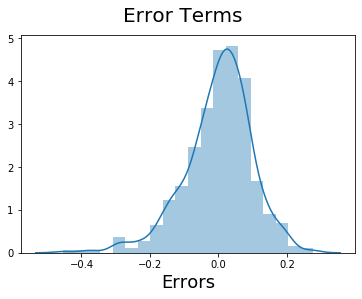

In [91]:
# Histogram to observe normal distributed curve for residuals

fig = plt.figure()
sns.distplot((y_train-y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

So, from the above plotted histogram we can clearly see that mean of the error is 0 (zero) and error is normally distributed.

##### Assumption-2 : Error terms are independent of each other

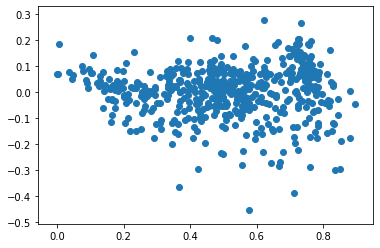

In [92]:
# Looking at the pattern of residuals
# We will check how residual is distributed with respect to the change in the value of predicted y_train('y_train_price')

res = (y_train-y_train_price)

plt.scatter(y_train_price,res)
plt.show()

We can see that residuals are not following any set pattern. So, we can say that error terms are independent of each other.

### Step 5) Making Predictions Using the Final Model

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For test data also we will follow the same steps that we followed  for train data

##### Scaling of the test data

In [93]:
# Let's scale the numerical features of the df_test so that we can compare them

num_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_list] = scaler.transform(df_test[num_list])

##### Dividing into x_test and y_test

In [94]:
# We will split the df_test data. Store target variable 'cnt' in y_test and rest other features in x_test.

y_test = df_test.pop('cnt')
x_test = df_test

In [95]:
# Adding constant variable to test dataframe

x_test_rfe_7 = sm.add_constant(x_test)

In [96]:
# Check the dataset

x_test_rfe_7.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [97]:
# Check the shape

x_test_rfe_7.shape

(219, 30)

##### Now, we need to drop that variables that were dropped after RFE and manually after using statsmodels while building the model on x_train.

In [98]:
# Drop the variables from x_test_rfe_7

x_test_rfe_7 = x_test_rfe_7.drop(['workingday', 'atemp', 'hum', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2'], axis=1)

In [99]:
# Check the final x_test_rfe_7 dataset

x_test_rfe_7.head()

,const,yr,holiday,temp,windspeed,season_2,season_4,mnth_9,weathersit_3
184,1.0,0,1,0.831783,0.084219,0,0,0,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0


In [100]:
# Check the shape

x_test_rfe_7.shape

(219, 9)

In [101]:
# making prediction using last model

y_pred = lm.predict(x_test_rfe_7)

In [102]:
# calculate the R-squared score on the test set

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7724376516730699

##### So, after calculating the R-squared score on the test set we got r2_score value of 0.7724376516730699, which is pretty good.

### Step 6) Model Evaluation

Text(0, 0.5, 'y_pred')

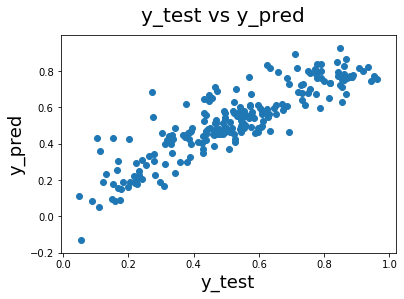

In [103]:
# Let's plot the graph to visualise actual vs predicted value

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 18)

##### The equation of our best fitted line is 

cnt = 0.2337 x yr - 0.0871 x holiday + 0.5687 x temp - 0.1453 x windspeed + 0.0802 x season_2 + 0.1275 x season_4 + 0.0891 x mnth_9 - 0.2541 x weathersit_3

###### So, we have finally build the model which would help the management of the BoomBikes to undestand that how demand vary with respect to different variables. 
###### After reading, understanding and preparing data for model building we built model with the help of mixed approach i.e automated approach i.e by RFE and sorting out 15 strong columns out of 30 and then manually by statsmodels. 
###### We observed p-value and VIF values for all different features and dropped every insignificant variable with high p-value and colinear variables having high VIF values. Finally we have following 8 reliable features : - "yr", "holiday", "temp", "windspeed", "season_2", "season_4", "mnth_9", "weathersit_3".
###### These features are the strongest  predictor of the count of the rented bikes.
###### "holiday", "windspeed" and "windspeed" have negative impact on the count of the rented bikes, whereas "yr", "temp", "season_2", "season_4", "mnth_9" are positively impacting the count of the bike.
###### While predicting we are getting r2_score of 0.77, which tells that 77% of the variance in being covered by the model, which is pretty good and while evaluating the model we can see the relation ship between y_test and y_pred and it is linear.
###### So, final equation of our best fit line is : - cnt = 0.2337 x yr - 0.0871 x holiday + 0.5687 x temp - 0.1453 x windspeed + 0.0802 x season_2 + 0.1275 x season_4 + 0.0891 x mnth_9 - 0.2541 x weathersit_3
###### Hence, management can count on this model and can do prediction based on this model.